In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.preprocessing import scale # scale and center data
from sklearn.svm import SVC # this will make a support vector machine for classificaiton
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.metrics import confusion_matrix # this creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix

# Cleaning Data

In [3]:
with open("diabetes_scale.txt") as file:
    all_lines = []
    targets = []
    for i in range(768):
        line = file.readline().split()

        an_other_list = []
        
        
        target_list = line[0]

        
        for j in line[1:]:
            each_line = j[2:]
            an_other_list.append(float(each_line))
        

        if len(an_other_list) !=7:
            all_lines.append(an_other_list)
            targets.append(int(target_list))

    

In [4]:
x = np.array(all_lines)
y = np.array(targets)

# Train and Test Split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

print("Number of sample for train: %d, test: %d"%(x_train.shape[0],x_test.shape[0]))

Number of sample for train: 531, test: 228


# Perceptron Algorithm: Training

In [6]:
#np.random.seed(1)
weight = np.random.random(8)

lr = 0.00009
num_epoch = 2000

accuracy_list = []
loss_list = []
f1_list = []

for epoch in range(num_epoch):
    
    predicted = []
    for row in x_train:
        activation = 0
        for i in range(len(row)):
            activation = activation + weight[i]*row[i]
        if activation >= 0:
            predicted.append(1)
        else:
            predicted.append(-1)

    accuracy = accuracy_score(y_train,predicted)
    accuracy_list.append(accuracy)
    
    f1 = f1_score(y_train,predicted)
    f1_list.append(f1)

    loss = np.sum(predicted != y_train)
    loss_list.append(loss)
    
    # calculate gradient
    grad = np.zeros(len(weight))
    for i in range(len(y_train)):
        activation = weight.dot(x_train[i])
        
        # when outcome and label does not match
        if y_train[i]*activation < 0: 
            grad = grad + y_train[i]*x_train[i]

    # update weight
    new_weight = weight + lr*grad
    weight = new_weight
    



With Epoch 9e-05, lr = 2000, loss is: 122


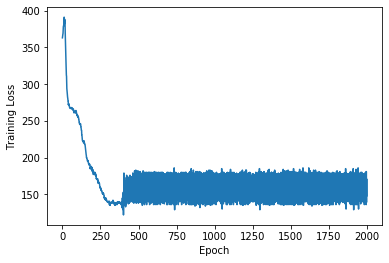

In [7]:
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
print("With Epoch {}, lr = {}, loss is: {}".format(lr, num_epoch, 
                                                   min(loss_list)))

With Epoch 9e-05, lr = 2000, accuracy is: 0.7702448210922788


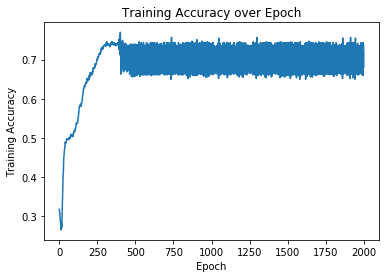

In [8]:
plt.plot(accuracy_list)
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy over Epoch')
print("With Epoch {}, lr = {}, accuracy is: {}".format(lr, num_epoch, max(accuracy_list)))



With Epoch 9e-05, lr = 2000, F1 score is: 0.7702448210922788


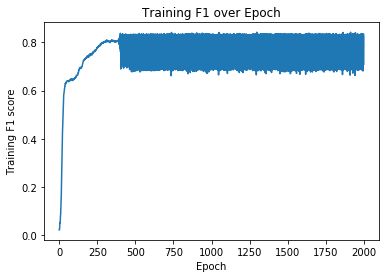

In [9]:
plt.plot(f1_list)
plt.xlabel('Epoch')
plt.ylabel('Training F1 score')
plt.title('Training F1 over Epoch')
print("With Epoch {}, lr = {}, F1 score is: {}".format(lr, num_epoch, max(accuracy_list)))




## Test with testing data

In [10]:
predicted_test = []
for row in x_test:
    activation = 0
    for i in range(len(row)):
        activation = activation + weight[i]*row[i]
    if activation >= 0:
        predicted_test.append(1)
    else:
        predicted_test.append(-1)

test_accuracy = accuracy_score(y_test, predicted_test)
test_f1 = f1_score(y_test, predicted_test)

In [11]:
print('The testing accuracy is: {}.'.format(test_accuracy))

The testing accuracy is: 0.6271929824561403.


In [12]:
print('The testing F1 score is: {}.'.format(test_f1))

The testing F1 score is: 0.6082949308755761.


# Further Exploration with Competing Algorithms

### Support Vector Classifier

In [ ]:
model = SVC()
model.fit(x_train, np.ravel(y_train,order='C'))
param_grid = {'kernel': ['rbf']}

In [15]:
optimal_params = GridSearchCV(SVC(), param_grid, cv=30,scoring="accuracy",refit = True, verbose = 3,n_jobs=-1)
optimal_params.fit(x_train, y_train)
optimal_params.best_params_
pred = optimal_params.predict(x_test) 
accuracy = accuracy_score(y_true=y_test,y_pred=pred)
accuracy

Fitting 30 folds for each of 1 candidates, totalling 30 fits


0.7894736842105263

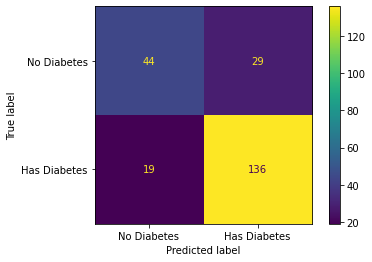

In [19]:
plot_confusion_matrix(optimal_params, x_test,y_test,display_labels= ["No Diabetes", "Has Diabetes"])

In [ ]:
# 23 Correctly predicted. 91 is correctly predicted. 

### Stochastic Gradient Descent with Perceptron Loss

In [17]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='perceptron', alpha=0.000009, max_iter=2000, n_jobs=-1)
# clf = SGDClassifier()
sgd.fit(x_train, y_train)
pred = sgd.predict(x_test) 
accuracy = accuracy_score(y_true=y_test,y_pred=pred)
accuracy

0.4780701754385965

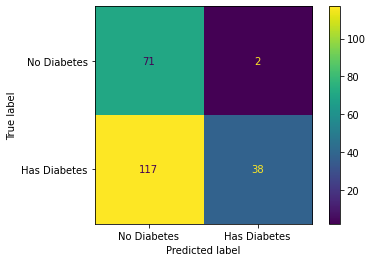

In [18]:
plot_confusion_matrix(sgd, x_test,y_test,display_labels= ["No Diabetes", "Has Diabetes"])